# Statistical-Methods Homework3: Two-way ANOVA（双因子方差分析）

https://github.com/QiushiSun

## 背景描述
实验研究了操作温度和三种面板玻璃材料对示波器管输出光的影响。
这是一个压力（因子𝐴）水平数 $𝑎=3$，温度（因子𝐵）水平数 $𝑏=3$ 和重复次数 $𝑛=3$ 的双因子实验。



## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Glass_Type | 玻璃材料类型 | categorical variable | [1，2，3] |
| （自变量）Temperature |   温度   | continuous variable | [100, 125, 150] |
| （因变量）Light_Output | 输出光 | continuous variable | $\mathbb{R}$ |

## 问题 
注：这里使用 $\alpha=0.05$ 的显著性水平

1. 试判断玻璃类型和温度对输出光是否有显著影响.
2. 用适合的残差图来检验设定模型的恰当性.
3. 选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.
4. 估计参数$\mu$、$\tau_{i}$、$\beta_{j}$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$
5. 如何对这种示波器管的输出光进行预测？

### Solution:

检验行处理效应的等式假设:  $𝐻_{01}:\tau_1=\tau_2=\cdots=\tau_a=0$  vs  $𝐻_{11}:\tau_i \neq 0, \exists i$  
检验列处理效应的等式假设:  $𝐻_{02}:\beta_1=\beta_2=\cdots=\beta_b=0$  vs  $𝐻_{12}:\beta_j \neq 0, \exists j$  
检验行与列处理没有交互作用假设:  $𝐻_{03}:(\tau\beta)_{ij}=0, \forall i,j$  vs  $𝐻_{13}:(\tau\beta)_{ij} \neq 0, \exists i,j$  

In [130]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
# multicomp 多重比较包

In [131]:
# parameters
alpha = 0.05
a = 3
b = 3
n = 3

In [132]:
x = pd.read_csv('Project3.csv')
data = x.values
df = pd.DataFrame(data, columns = ['Glass_Type', 'Temperature', 'Light_Output'])
print(df.head(10))

   Glass_Type  Temperature  Light_Output
0           1          100           580
1           1          100           568
2           1          100           570
3           2          100           550
4           2          100           530
5           2          100           579
6           3          100           546
7           3          100           575
8           3          100           599
9           1          125          1090


#### Q1:试判断玻璃类型和温度对输出光是否有显著影响

 

$\color{blue}{Q1 \; Solution:}$

In [133]:
# 双因子方差分析
model = ols('Light_Output~ C(Glass_Type) + C(Temperature) + C(Glass_Type):C(Temperature)',df).fit()
anova_results = anova_lm(model)
print('\n双因素方差分析表：\n', anova_results)


双因素方差分析表：
                                 df        sum_sq        mean_sq            F  \
C(Glass_Type)                  2.0  1.508645e+05   75432.259259   206.370554   
C(Temperature)                 2.0  1.970335e+06  985167.259259  2695.259499   
C(Glass_Type):C(Temperature)   4.0  2.905517e+05   72637.925926   198.725707   
Residual                      18.0  6.579333e+03     365.518519          NaN   

                                    PR(>F)  
C(Glass_Type)                 3.886026e-13  
C(Temperature)                5.008957e-23  
C(Glass_Type):C(Temperature)  1.254188e-14  
Residual                               NaN  


In [134]:
if anova_results['PR(>F)'][0] < alpha:
    print('\nFor Glass_Type, p-value: %f < 0.05, reject H01.'% anova_results['PR(>F)'][0])
else:
    print('\nFor Glass_Type, accept H01.')


For Glass_Type, p-value: 0.000000 < 0.05, reject H01.


In [135]:
if anova_results['PR(>F)'][1] < alpha:
    print('\nFor Temperature, p-value: %f < 0.05, reject H02.'% anova_results['PR(>F)'][1])
else:
    print('\nFor Temperature, accept H02.')


For Temperature, p-value: 0.000000 < 0.05, reject H02.


In [136]:
if anova_results['PR(>F)'][2] < alpha:
    print('\nFor Glass_Type:Temperature, p-value: %f < 0.05, reject H03.'% anova_results['PR(>F)'][2])
else:
    print('\nFor material:Temperature, accept H03.')


For Glass_Type:Temperature, p-value: 0.000000 < 0.05, reject H03.


观察双因子方差分析表，可知在$\alpha=0.05$的水平下：  

1. 对玻璃材料类型来说，$p=0.000000<0.05$，所以玻璃材料类型对输出光有显著影响；  
2. 对温度来说，$p=0.000000<0.05$，所以温度对输出光也具有显著影响；  
3. 对玻璃材料类型和温度的交互因素来说，$p=0.000000<0.05$，所以二者的交互因素对输出光的影响显著.

【多重比较】在双因子析因设计实验中，如果交互作用是显著的，一个因子（例如，因子 𝐴）的均值间的比较可能由于交互作用而模糊不清。解决这类问题的方法是：将另一个因子（因子 𝐵）固定在一特定水平上，在此水平上对因子 𝐴 的均值使用 Tukey 检验法。
由上面方差分析表可知，行均值、列均值和交互项均有显著性差异，所以下面我们进一步固定温度水平为 70℉，对 3 种材料进行多重比较，以Tukey的Honestly Significant Difference(HSD)检验法为例:

Glass type 1， Multi-comparison: 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   100    125 514.6667 0.001  501.452 527.8814   True
   100    150 813.3333 0.001 800.1186  826.548   True
   125    150 298.6667 0.001  285.452 311.8814   True
-----------------------------------------------------
Glass type 2， Multi-comparison: 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   100    125    482.0 0.001 416.6997 547.3003   True
   100    150    760.0 0.001 694.6997 825.3003   True
   125    150    278.0 0.001 212.6997 343.3003   True
-----------------------------------------------------
Glass type 3， Multi-comparison: 
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower     upper   reject
------------------------------

/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))
/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))
/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


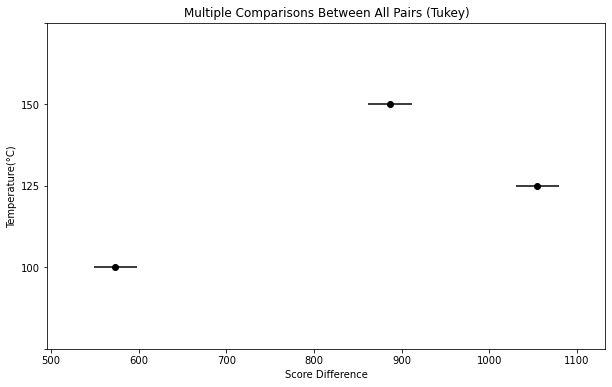

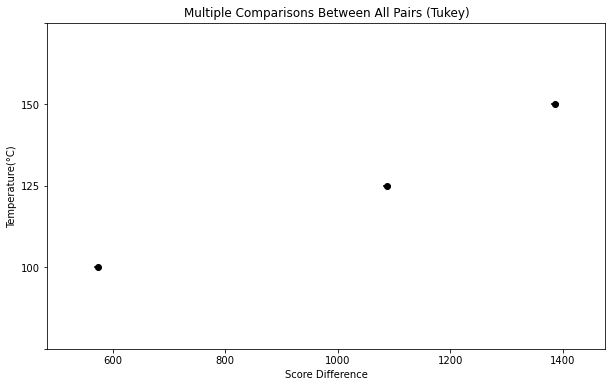

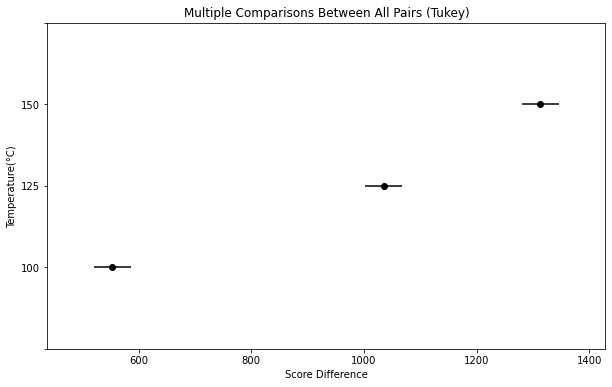

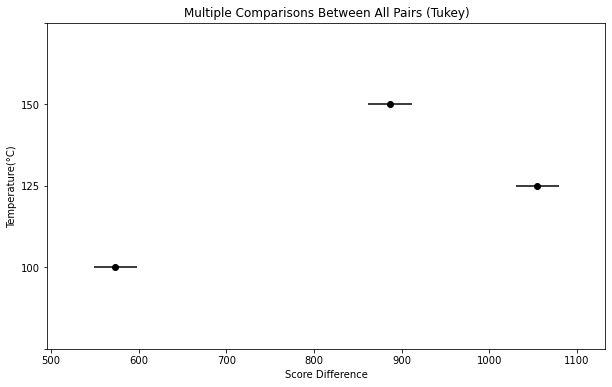

In [137]:
# Use Tukey HSD for Multi-comparison

multiComp1 = MultiComparison(df.loc[df['Glass_Type'] == 1, 'Light_Output'], df.loc[df['Glass_Type'] == 1, 'Temperature'])
tukey = multiComp1.tukeyhsd()
print('Glass type 1， Multi-comparison: \n', tukey)
tukey.plot_simultaneous(ylabel= 'Temperature(°C)', xlabel= 'Score Difference')

multiComp2 = MultiComparison(df.loc[df['Glass_Type'] == 2, 'Light_Output'], df.loc[df['Glass_Type'] == 2, 'Temperature'])
tukey = multiComp2.tukeyhsd()
print('Glass type 2， Multi-comparison: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Temperature(°C)', xlabel= 'Score Difference')

multiComp3 = MultiComparison(df.loc[df['Glass_Type'] == 3, 'Light_Output'], df.loc[df['Glass_Type'] == 3, 'Temperature'])
tukey = multiComp3.tukeyhsd()
print('Glass type 3， Multi-comparison: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Temperature(°C)', xlabel= 'Score Difference')

这一分析的结果说明：

玻璃类型1和玻璃类型2的输出光随温度上升而提高，第三类3玻璃输出光水平在125°C达到最高，100°F达到最低，当温度水平为 125℉ 时，材料类型1与类材料型3，材料类型2与类型3的输出光差异不显著，但材料类型1与类型2的输出光具有显著差异。

$\color{blue}{{Q2 \; Solution:}}$

#### Q2:用适合的残差图来检验设定模型的恰当性.

In [138]:
# Residual Analysis

list_temp = [100, 125, 150]
data_res = data.astype(float)
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_res[(data_res[:,0] == i + 1) & (data_res[:,1] == j),2] = cnt-np.mean(cnt)
        
df = pd.DataFrame(data_res, columns = ['Glass_Type', 'Temperature', 'Light_Output'])

df.head(10)

,Glass_Type,Temperature,Light_Output
0,1.0,100.0,7.333333
1,1.0,100.0,-4.666667
2,1.0,100.0,-2.666667
3,2.0,100.0,-3.000000
4,2.0,100.0,-23.000000
5,2.0,100.0,26.000000
6,3.0,100.0,-27.333333
7,3.0,100.0,1.666667
8,3.0,100.0,25.666667
9,1.0,125.0,2.666667


**残差分析1:残差正态概率图分析**

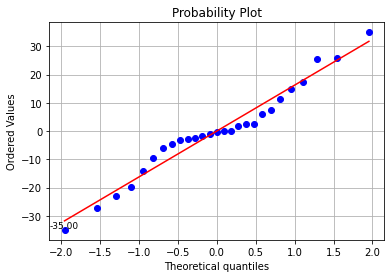

In [139]:
# 正态概率图

res = data_res[:, 2]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [140]:
loss = sum(np.power(res,2))/((n-1)*a*b)

# get normalized redisual

d_max=max(abs(osm[1]))/(loss**0.5)

print("maximum normalized residual:",round(dmax,5))
if d_max<3:
    print("accept")
else:
    print("reject")

maximum normalized residual: 1.83068
accept


Remark: 残差计算

1. $e_{ijk}=y_{ijk}-\hat{y_{ijk}}$

2. $\hat{y_{ijk}} = \bar{{y_{ij}}}$

3. $e_{ijk}=y_{ijk}-\bar{y_{ij}}$

无特别的证据说明违背数据正态性；
异常值的检测：
$\frac{-35.000}{\sqrt{365.518}}=-1.83>-2$ (**注意是除以根号下均方误差**) 

因此认为残差服从正态.

我们可以使用*Shapiro-Wilk*检验进行第二次检验

In [141]:
# Use Shapiro-Wilk for normalization test

SW, pValue1 = stats.shapiro(res)

print('Shapiro-Wilk Test:')

print('alpha=',alpha)

if pValue1>alpha:
    print("since pvalue p=%.2f > %.2f，accept."%(pValue1,alpha))
else:
    print("since pvalue p=%.2f < %.2f，reject."%(pValue1,alpha))

Shapiro-Wilk Test:
alpha= 0.05
since pvalue p=0.52 > 0.05，accept.


可见，若再使用Shapiro-Wilk检验方法进行第二次检验，同样可以确认其正态性。

**残差分析2：残差与预测值关系图**

Text(0, 0.5, 'e_ijk')

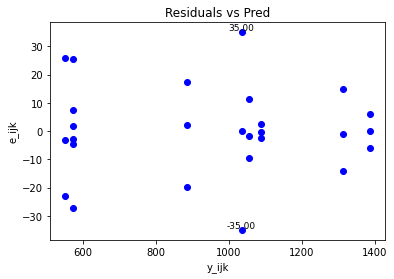

In [142]:
y2 = []
for i in list_temp:
    for j in range(a):
        for k in range(n):
            y2.append(np.mean(data[(data[:,0] == j + 1) & (data[:,1] == i), 2]))
            
plt.scatter(y2, res, c = 'blue')
plt.title('Residuals vs Pred')
plt.text(y2[12], res[12], '%.2f' % float(res[12]), ha='center', va= 'bottom', fontsize=9)
plt.text(y2[14], res[14], '%.2f' % float(res[14]), ha='center', va= 'bottom', fontsize=9)
plt.xlabel('y_ijk')
plt.ylabel('e_ijk')

**残差分析3：残差与材料的关系图**  

从上图可以看出，当输出光很小时，残差方差同样较小。但当输出光增大时，先增后减，方差最大值在略微超过1000处。

Text(0, 0.5, 'e_ijk')

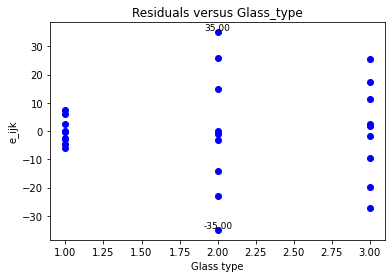

In [143]:
y3 = data_res[:,0]
plt.scatter(y3, res, c = 'blue')
plt.title('Residuals versus Glass_type')
plt.text(y3[12], res[12], '%.2f' % float(res[12]), ha='center', va= 'bottom', fontsize=9)
plt.text(y3[14], res[14], '%.2f' % float(res[14]), ha='center', va= 'bottom', fontsize=9)
plt.xlabel('Glass type')
plt.ylabel('e_ijk')

上图显示出方差存在不等性：玻璃材料类型为第一种时，比其他情况下方差显著地小。

**残差分析4：残差与温度的关系图**  

Text(0, 0.5, 'e_ijk')

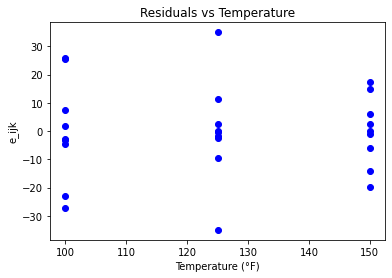

In [144]:
y4 = data_res[:,1]
plt.scatter(y4, res, c = 'blue')
plt.title('Residuals vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('e_ijk')

上图显示出方差微弱的不等性：T=125时，比其他情况下方差更大。

可以从图中看到，数据中包含了两个极端残差值：-35与35

第二、三种材料的残差无明显区别；当温度为 125 时，方差反而最小。

重新审查这些数据，并未显出任何明显的问题，比如记录错误等，所有我们把这些响应作为真实数据接收下来。

#### Q3:选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.

$\color{blue}{{Q3 \; Solution:}}$

   Glass_type   Temp       Light
0         1.0  100.0  572.666667
1         1.0  100.0  572.666667
2         1.0  100.0  572.666667
3         2.0  100.0  553.000000
4         2.0  100.0  553.000000


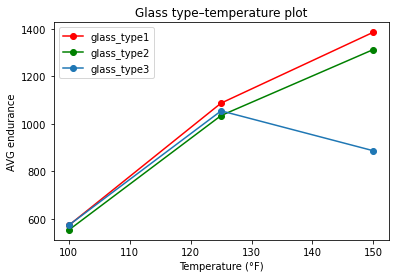

In [145]:
# Fixed

data_avg = data.astype(float) * 1
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_avg[(data_avg[:,0] == i + 1) & (data_avg[:,1] == j),2] = np.mean(cnt)
        
df = pd.DataFrame(data_avg, columns = ['Glass_type', 'Temp', 'Light'])
print(df.head(5))

type1 = data_avg[[0,9,18], 2]
type2 = data_avg[[3,12,21], 2]
type3 = data_avg[[6,15,24], 2]

c1 = pd.Series(type1, index = list_temp, name = 'type1')
c2 = pd.Series(type2, index = list_temp, name = 'type2')
c3 = pd.Series(type3, index = list_temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', marker = 'o', label = 'glass_type1')
plt.plot(df.iloc[:,1], color = 'green', marker = 'o', label = 'glass_type2')
plt.plot(df.iloc[:,2], marker = 'o', label = 'glass_type3')

plt.title('Glass type–temperature plot')
plt.xlabel('Temperature (°F)')
plt.ylabel('AVG endurance')
plt.legend(['glass_type1', 'glass_type2', 'glass_type3'])

上图描述了每一种处理组合的平均响应图，因为线段不平行，所以交互作用显著。

从低温变化至中等温度时，三种材料的输出光都有显著的增加。从中等温度变至高温时，用材料类型 3 生产的示波器的输出光减少，而其余两者的输出光进一步增强，其中材料类型1的光强最高。

因此可得出结论：如果我们希望尽量提高输出光的强度，材料类型 1 给出了最好的结果。

#### Q4:估计参数$\mu$、$\tau_{i}$、$\beta_{j}$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$

$\color{blue}{{Q4 \; Solution:}}$

估计参数$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$  
1. $\hat{\mu}=\bar{y}_{\cdots}$  
2. $\hat{\tau_i}=\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdots},\quad i = 1,2,\cdots,a$  
3. $\hat{\beta_j}=\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdots},\quad j = 1,2,\cdots,b$  
4. $\hat{\tau\beta}_{ij}=\bar{y}_{ij\cdot}-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdots},\quad i = 1,2,\cdots,a\quad j = 1,2,\cdots,b$

In [146]:
mu = np.mean(data[:,2])
print('总平均效应：', round(mu, 2))

总平均效应： 940.19


In [147]:
tau = []
for i in range(a):
    tau.append(np.mean(data[data[:,0] == i + 1, 2]) - mu)
    
print('因子的水平效应：\n', np.round(tau, 2))

因子的水平效应：
 [  75.15   26.81 -101.96]


In [148]:
Beta = []
for j in list_temp:
    Beta.append(np.mean(data[data[:,1] == j, 2]) - mu)
print('温度因子的水平效应：\n', np.round(Beta, 2))

温度因子的水平效应：
 [-373.85  118.81  255.04]


In [149]:
tau_beta = []
k = 0
for i in range(a):
    tau_beta.append([])
    for j in range(b):
        cnt = data_avg[0 + 3 * k, 2] - tau[i] - Beta[j] + mu
        tau_beta[i].append(cnt)
    k += 3
print('两因子之间的交互作用效应：\n', np.round(tau_beta, 2))

两因子之间的交互作用效应：
 [[1811.56 1318.89 1182.67]
 [2374.56 1881.89 1745.67]
 [2802.   2309.33 2173.11]]


#### Q5:如何对这种示波器管的输出光进行预测？

$\color{blue}{{Q5 \; Solution:}}$

由于温度是定量的，而材料类型是定性的。再者，温度有 3 个水平。因此，我们可计算线性的和二次的温度效应，以便研究温度怎样影响玻璃的性能。  
这里我们画出响应曲线（response curve）可以得到响应变量与定量因子——温度的关系。一般地，线性回归方法可用于为实验数据拟合相应的模型。  

$$Light = \beta_0+\beta_1A+\beta_2B_1+\beta_3B_2+\beta_4A^2+\beta_5AB_1+\beta_6AB_2+\beta_7A^2B_1+\beta_8A^2B_2$$

其中，分量 $A, A^2$ 分别表示温度因子的一次效应、二次效应，$B$ 表示材料类型因子的主效应。温度对应三个水平：100,125,175，对应的温度水平分别为 $A=-1,0,+1$。变量 $B[1]$ 和 $B[2]$ 被认为是示性变量（indicator variable），其定义为:  

|  | 1 | 2 | 3 |  
| :--------: | :--------: | :--------: | :---------: |  
| $B[1]$ |   1   |   0   |   -1   |  
| $B[2]$ |   0   |   1   |   -1   |

In [150]:
# 8 variables

list_A = [-1, 0, 1]
list_B1 = [1, 0, -1]
list_B2 = [0, 1, -1]

A = data[:,1]
B1 = B2 = data[:, 0]
for i in range(3):
    A = [list_A[i] if j == list_temp[i] else j for j in A]
    B1 = [list_B1[i] if j == i + 1 else j for j in B1]
    B2 = [list_B2[i] if j == i + 1 else j for j in B2]


A = np.asarray(A)
AA = A**2
B1 = np.asarray(B1)
B2 = np.asarray(B2)
AB1 = A*B1
AB2 = A*B2
AAB1 = AA*B1
AAB2 = AA*B2

df = pd.DataFrame(A, columns = ['A'])
df['B1'] = B1
df['B2'] = B2
df['AA'] = AA
df['AB1'] = AB1
df['AB2'] = AB2
df['AAB1'] = AAB1
df['AAB2'] = AAB2
df['Light'] = data[:,2]
print(df.head())

model = ols('Light~ A + B1 + B2 + AA + AB1 + AB2 + AAB1 + AAB2',df).fit()
param = model.params

print(param)
model.summary()

   A  B1  B2  AA  AB1  AB2  AAB1  AAB2  Light
0 -1   1   0   1   -1    0     1     0    580
1 -1   1   0   1   -1    0     1     0    568
2 -1   1   0   1   -1    0     1     0    570
3 -1   0   1   1    0   -1     0     1    550
4 -1   0   1   1    0   -1     0     1    530
Intercept    1059.000000
A             314.444444
B1             28.333333
B2            -24.000000
AA           -178.222222
AB1            92.222222
AB2            65.555556
AAB1           70.222222
AAB2           76.222222
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Light   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.78e-21
Time:                        21:03:59   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1059.0000      6.373    166.174      0.000    1045.611    1072.389
A            314.4444      4.506     69.779      0.000     304.977     323.912
B1            28.3333      9.013      3.144      0.006       9.399      47.268
B2           -24.0000      9.013     -2.663      0.016     -42.935      -5.065
AA          -178.2222      7.805    -22.834      0.000    -194.620    -161.824
AB1           92.2222      6.373     14.471      0.000      78.833     105.611
AB2           65.5556      6.373     10.287      0.000      52.167      78.944
AAB1          70.2222     11.038      6.362      0.000      47.032      93.412
AAB2          76.2222     11.038      6.905      0.000      53.032      99.412
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                         5.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

拟合曲线[-1, 1]： 

$$GlassLight = 1059+314.44 *A+28.33 *B[1]-24 *B[2]-178.22 *A^2+92.22 *AB[1]+65.56 *AB[2]+70.22 *A^2B[1]+76.22 *A^2B[2]$$

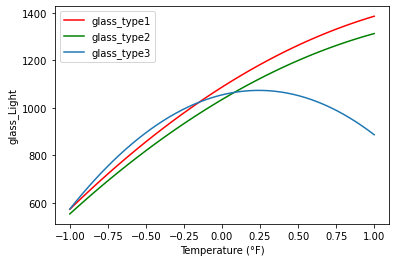

In [151]:
# fit response curve

temp = np.linspace(-1, 1)
glass_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
glass_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
glass_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]

c1 = pd.Series(glass_type1, index = temp, name = 'glass_type1')
c2 = pd.Series(glass_type2, index = temp, name = 'glass_type2')
c3 = pd.Series(glass_type3, index = temp, name = 'glass_type3')

df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'glass_type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'glass_type2')
plt.plot(df.iloc[:,2], label = 'glass_type3')

plt.xlabel('Temperature (°F)')
plt.ylabel('glass_Light')
plt.legend(['glass_type1', 'glass_type2', 'glass_type3'])

In [152]:
print("Curve [-1,1]")
for i in range(3):
    print("Glass_type %d：y = %.2f % +.2f * Temp % +.2f * Temp^2"%(i+1,param[0]+param[2]*list_B1[i]+param[3]*list_B2[i],param[1]+param[5]*list_B1[i]+param[6]*list_B2[i],param[4]+param[7]*list_B1[i]+param[8]*list_B2[i]))

Curve [-1,1]
Glass_type 1：y = 1087.33 +406.67 * Temp -108.00 * Temp^2
Glass_type 2：y = 1035.00 +380.00 * Temp -102.00 * Temp^2
Glass_type 3：y = 1054.67 +156.67 * Temp -324.67 * Temp^2


**拟合曲线[-1, 1]：**

[-1,1]材料类型为 1：

$y = 1087.33 + 406.67 ∗ Temp - 108 ∗ Temp^2 $

[-1,1]材料类型为 2：

$y = 1035.00 + 380.00 ∗ Temp − 102.00 ∗ Temp^2 $

[-1,1]材料类型为 3：

$y = 1054.67 + 156.67 ∗ Temp − 324.67 ∗ Temp^2 $

#### 接下来拟合曲线[100, 150]： 

In [153]:
# 8 variables
# 100,125,150
# list_A = [-1, 0, 1]
# list_B1 = [1, 0, -1]
# list_B2 = [0, 1, -1]

list_A = [100, 125, 150]
list_B1 = [150, 125, 100]
list_B2 = [125, 150, 100]

A = data[:,1]
B1 = B2 = data[:, 0]
for i in range(3):
    A = [list_A[i] if j == list_temp[i] else j for j in A]
    B1 = [list_B1[i] if j == i + 1 else j for j in B1]
    B2 = [list_B2[i] if j == i + 1 else j for j in B2]


A = np.asarray(A)
AA = A**2
B1 = np.asarray(B1)
B2 = np.asarray(B2)
AB1 = A*B1
AB2 = A*B2
AAB1 = AA*B1
AAB2 = AA*B2
df = pd.DataFrame(A, columns = ['A'])
df['B1'] = B1
df['B2'] = B2
df['AA'] = AA
df['AB1'] = AB1
df['AB2'] = AB2
df['AAB1'] = AAB1
df['AAB2'] = AAB2
df['Light'] = data[:,2]
print(df.head())

model = ols('Light~ A + B1 + B2 + AA + AB1 + AB2 + AAB1 + AAB2',df).fit()
param = model.params

print(param)
model.summary()

     A   B1   B2     AA    AB1    AB2     AAB1     AAB2  Light
0  100  150  125  10000  15000  12500  1500000  1250000    580
1  100  150  125  10000  15000  12500  1500000  1250000    568
2  100  150  125  10000  15000  12500  1500000  1250000    570
3  100  125  150  10000  12500  15000  1250000  1500000    550
4  100  125  150  10000  12500  15000  1250000  1500000    530
Intercept   -19351.555555
A              345.200000
B1              52.911111
B2              62.151111
AA              -1.456711
AB1             -0.976000
AB2             -1.114667
AAB1             0.004494
AAB2             0.004878
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Light   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.78e-21
Time:                        21:04:00   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.935e+04   1366.095    -14.166      0.000   -2.22e+04   -1.65e+04
A            345.2000     22.333     15.457      0.000     298.280     392.120
B1            52.9111     10.821      4.890      0.000      30.177      75.645
B2            62.1511     10.821      5.744      0.000      39.417      84.885
AA            -1.4567      0.089    -16.334      0.000      -1.644      -1.269
AB1           -0.9760      0.177     -5.517      0.000      -1.348      -0.604
AB2           -1.1147      0.177     -6.301      0.000      -1.486      -0.743
AAB1           0.0045      0.001      6.362      0.000       0.003       0.006
AAB2           0.0049      0.001      6.905      0.000       0.003       0.006
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                     1.12e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

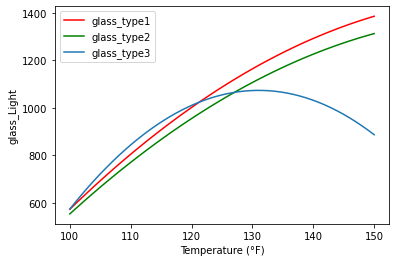

In [154]:
# fit response curve

temp = np.linspace(100, 150)
glass_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
glass_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
glass_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]

c1 = pd.Series(glass_type1, index = temp, name = 'glass_type1')
c2 = pd.Series(glass_type2, index = temp, name = 'glass_type2')
c3 = pd.Series(glass_type3, index = temp, name = 'glass_type3')

df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'glass_type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'glass_type2')
plt.plot(df.iloc[:,2], label = 'glass_type3')

plt.xlabel('Temperature (°F)')
plt.ylabel('glass_Light')
plt.legend(['glass_type1', 'glass_type2', 'glass_type3'])

In [155]:
print("Curve [100,150]")
for i in range(3):
    print("Glass_type %d：y = %.2f % +.2f * Temp % +.2f * Temp^2"%(i+1,param[0]+param[2]*list_B1[i]+param[3]*list_B2[i],param[1]+param[5]*list_B1[i]+param[6]*list_B2[i],param[4]+param[7]*list_B1[i]+param[8]*list_B2[i]))

Curve [100,150]
Glass_type 1：y = -3646.00 +59.47 * Temp -0.17 * Temp^2
Glass_type 2：y = -3415.00 +56.00 * Temp -0.16 * Temp^2
Glass_type 3：y = -7845.33 +136.13 * Temp -0.52 * Temp^2


**拟合曲线[100, 150]：**

[100,150]类型1：

$y = -3646.00 + 59.47 * Temp - 0.17 * Temp^2 $

[100,150]类型2：

$y = -3415.00 + 56.00 * Temp − 0.16 * Temp^2 $

[100,150]类型3：

$y = -7845.33 + 136.13 * Temp − 0.52 * Temp^2 $

**Remark:工业应用为什么做response curve？**

1. 预测，预测取值范围外的点，寻找最优值
2. 用于插值

**收获**：本次实验对双因子方差分析有了一定的了解，在代码实践中对相关的参数估计，模型恰当性检验，以及曲线拟合等任务有了比较深入的了解。巩固了之前实验中涉及的检验方法的运用，并且尝试了两种scale下的respond curve拟合，对课本知识有了更深入的理解。

**End of Homework3**

**谢谢助教老师，您幸苦了**